# <center> **Tugas Besar IF2220 Probabilitas dan Statistika<br>Penarikan Kesimpulan dan Pengujian Hipotesis** </center>
***

### **Anggota Kelompok (K-02):**
1. Firizky Ardiansyah (13520095)
2. Muhammad Fahmi Irfan (13520152) 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from math import *
from IPython.display import Markdown, display

***
### **Data Water Potability**

Diberikan sebuah data water_potability.csv yang dapat diakses pada utas berikut: __[Dataset Tugas Besar IF2220]([http://url](https://github.com/firizky29/probability-and-statistics-analysis/blob/main/data/water_potability.csv))__. water_potability.csv merupakan data metrik kualitas air yang
mengandung 11 kolom sebagai berikut:
1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability 

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.

In [69]:
column_name = ['id', 'pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic Carbon', 
'Trihalomethanes', 'Turbidity', 'Potability']

data = pd.read_csv("../data/water_potability.csv", names = column_name)
df = pd.DataFrame(data)

df

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic Carbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


> **Asumsi kolom numerik**: Kolom yang bertipe real maupun bilangan bulat. Kolom *id* dan kolom target yaitu *Potability* tidak dianalisis, kecuali disebutkan secara eksplisit dalam soal.


***
### **SOAL 1**
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

***
#### **Deskripsi Umum**

In [193]:
# Description
desc = df[df.columns[1:10]].describe()
desc.loc['variance'] = df.var()
desc.loc['range'] = df.max() - df.min()
desc.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)
desc.loc['skewness'] = df.skew()
desc.loc['kurtosis'] = df.kurtosis()

desc

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic Carbon,Trihalomethanes,Turbidity
count,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497
std,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471
min,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882
50%,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374
75%,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663
max,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749
variance,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135
range,13.772501,243.845890,5.616773e+04,11.736129,352.030642,551.722883,24.806707,115.422987,5.044749


***
#### **Modus Kolom pH**

In [144]:
print('Kolom pH :')
print(df['pH'].mode())

Kolom pH :
0        0.227499
1        0.989912
2        1.431782
3        1.757037
4        1.985383
          ...    
2005    11.568768
2006    11.898078
2007    12.246928
2008    13.349889
2009    14.000000
Length: 2010, dtype: float64


***
#### **Modus Kolom Hardness**

In [145]:
print('Kolom Hardness :')
print(df['Hardness'].mode())

Kolom Hardness :
0        73.492234
1        77.459586
2        81.710895
3        94.091307
4        94.812545
           ...    
2005    286.567991
2006    287.975540
2007    300.292476
2008    306.627481
2009    317.338124
Length: 2010, dtype: float64


***
#### **Modus Kolom Solids**

In [146]:
print('Kolom Solids :')
print(df['Solids'].mode())

Kolom Solids :
0         320.942611
1        1198.943699
2        1351.906979
3        1372.091043
4        2552.962804
            ...     
2005    50793.898917
2006    53735.899194
2007    55334.702799
2008    56351.396304
2009    56488.672413
Length: 2010, dtype: float64


***
#### **Modus Kolom Chloramines**

In [147]:
print('Kolom Chloramines :')
print(df['Chloramines'].mode())

Kolom Chloramines :
0        1.390871
1        1.920271
2        2.397985
3        2.456014
4        2.458609
          ...    
2005    12.580026
2006    12.626900
2007    12.653362
2008    13.043806
2009    13.127000
Length: 2010, dtype: float64


***
#### **Modus Kolom Sulfate**

In [148]:
print('Kolom Sulfate :')
print(df['Sulfate'].mode())

Kolom Sulfate :
0       129.000000
1       180.206746
2       182.397370
3       187.170714
4       187.424131
           ...    
2005    458.441072
2006    460.107069
2007    475.737460
2008    476.539717
2009    481.030642
Length: 2010, dtype: float64


***
#### **Modus Kolom Conductivity**

In [149]:
print('Kolom Conductivity :')
print(df['Conductivity'].mode())

Kolom Conductivity :
0       201.619737
1       210.319182
2       233.907965
3       245.859632
4       252.968328
           ...    
2005    666.690618
2006    669.725086
2007    695.369528
2008    708.226364
2009    753.342620
Length: 2010, dtype: float64


***
#### **Modus Kolom Organic Carbon**

In [150]:
print('Kolom Organic Carbon :')
print(df['Organic Carbon'].mode())

Kolom Organic Carbon :
0        2.200000
1        4.371899
2        4.466772
3        4.861631
4        4.966862
          ...    
2005    23.569645
2006    23.604298
2007    23.917601
2008    24.755392
2009    27.006707
Length: 2010, dtype: float64


***
#### **Modus Kolom Trihalomehanes**

In [151]:
print('Kolom Trihalomethanes :')
print(df['Trihalomethanes'].mode())

Kolom Trihalomethanes :
0         8.577013
1        14.343161
2        15.684877
3        16.291505
4        17.527765
           ...    
2005    114.034946
2006    114.208671
2007    116.161622
2008    120.030077
2009    124.000000
Length: 2010, dtype: float64


***
#### **Modus Kolom Turbidity**

In [152]:
print('Kolom Turbidity :')
print(df['Turbidity'].mode())

Kolom Turbidity :
0       1.450000
1       1.492207
2       1.496101
3       1.680554
4       1.812529
          ...   
2005    6.307678
2006    6.357439
2007    6.389161
2008    6.494249
2009    6.494749
Length: 2010, dtype: float64


***
#### **Modus Keseluruhan**

In [194]:
df[df.columns[1:10]].mode()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic Carbon,Trihalomethanes,Turbidity
0,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
1,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207
2,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101
3,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554
4,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529
...,...,...,...,...,...,...,...,...,...
2005,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678
2006,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439
2007,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161
2008,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249


***
### **SOAL 2**
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

In [153]:
def visualizeDistributionPlot(df):
    _, axes = plt.subplots(1, 2, figsize = (16, 7))
    sns.histplot(data=df, ax=axes[0])
    df.plot(kind = "box", ax = axes[1])

***

#### **Plot Distribusi Kolom pH**

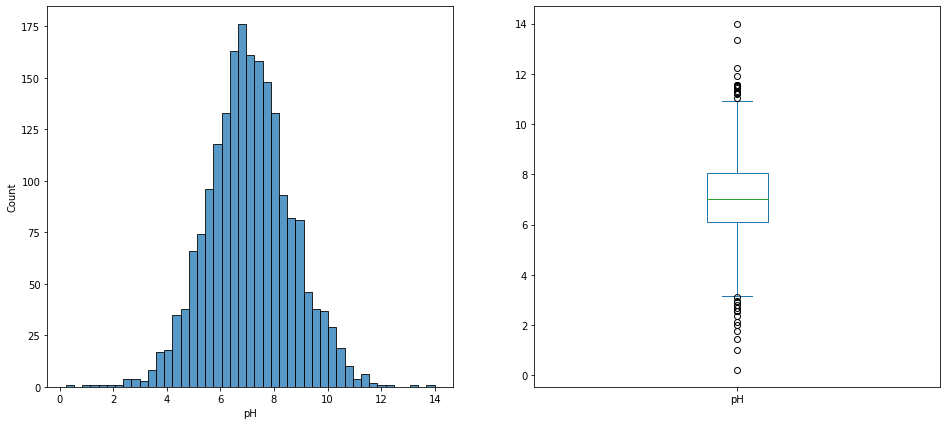

In [154]:
visualizeDistributionPlot(df["pH"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kiri sehingga memiliki positive skew, tetapi kecenderungan ini mendekati nol sehingga dapat diabaikan. Selain itu, plot distribusi cenderung lebih ramping dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah leptokurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih ramping. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di kedua ujung.
***

#### **Plot Distribusi Kolom Hardness**

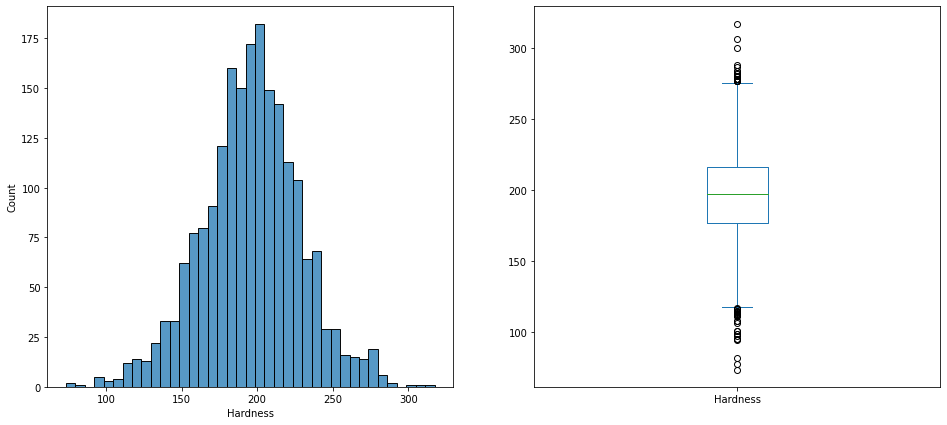

In [155]:
visualizeDistributionPlot(df["Hardness"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kanan sehingga memiliki negative skew. Selain itu, plot distribusi cenderung lebih ramping dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah leptokurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih ramping dan memiliki kecenderungan. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di kedua ujung.
***

#### **Plot Distribusi Kolom Solids**

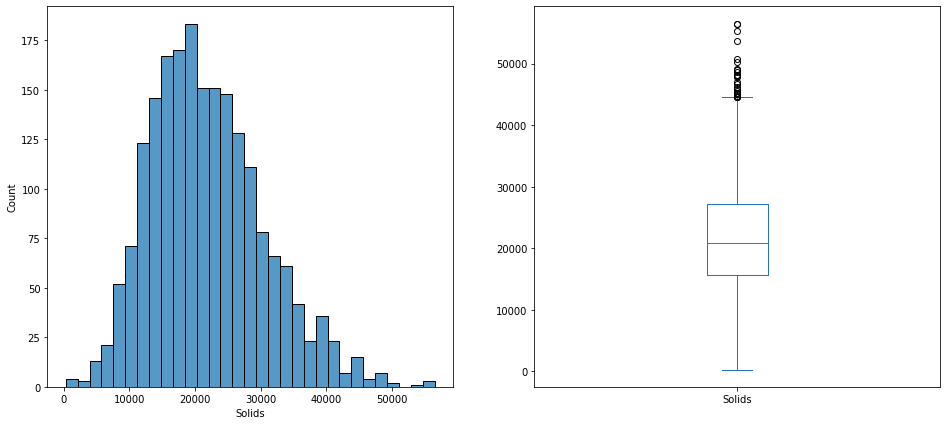

In [156]:
visualizeDistributionPlot(df["Solids"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kiri sehingga memiliki positive skew. Selain itu, plot distribusi cenderung lebih ramping dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah leptokurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih ramping dan memiliki kecenderungan. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di bagian atas *upper-tail*
***

#### **Plot Distribusi Kolom Chloramines**

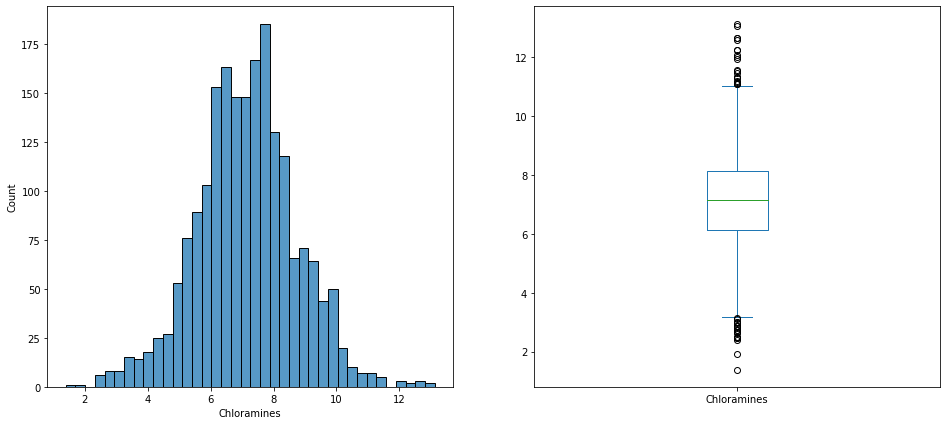

In [157]:
visualizeDistributionPlot(df["Chloramines"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kiri sehingga memiliki positive skew, tetapi kecenderungan ini mendekati nol sehingga dapat diabaikan. Selain itu, plot distribusi cenderung lebih ramping dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah leptokurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih ramping. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di kedua ujung.
***

#### **Plot Distribusi Kolom Sulfate**

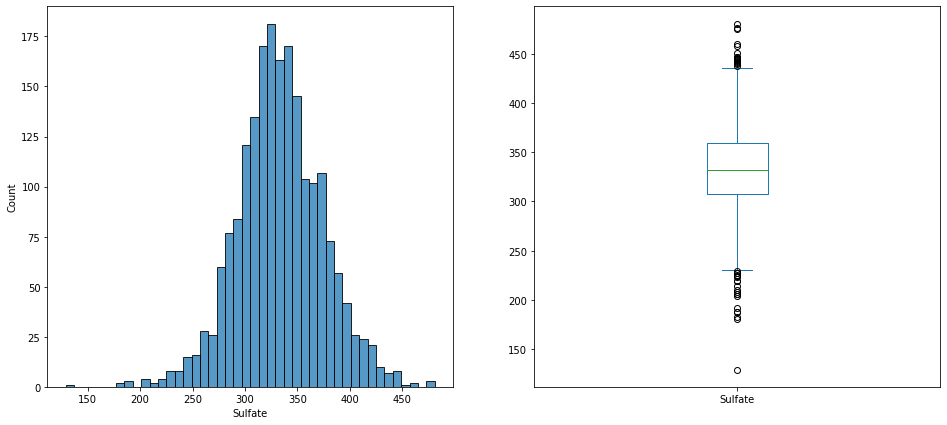

In [158]:
visualizeDistributionPlot(df["Sulfate"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kanan sehingga memiliki negative skew, tetapi kecenderungan ini mendekati nol sehingga dapat diabaikan. Selain itu, plot distribusi cenderung lebih ramping dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah leptokurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih ramping. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di kedua ujung.
***

#### **Plot Distribusi Kolom Conductivity**

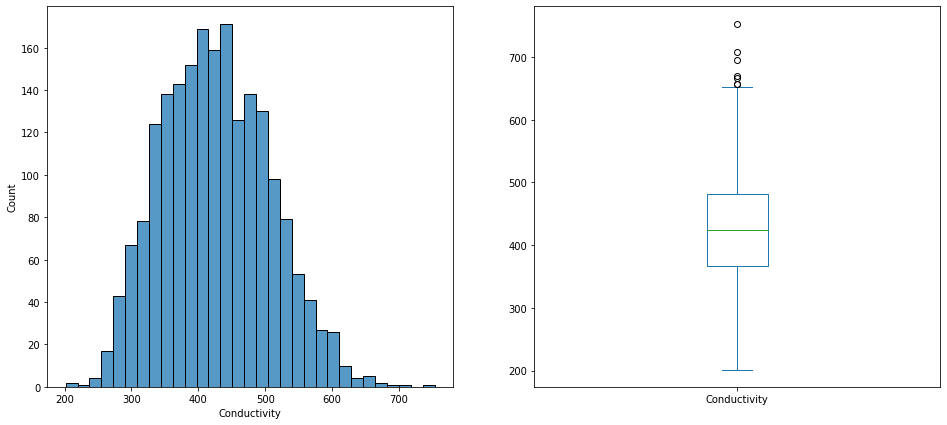

In [159]:
visualizeDistributionPlot(df["Conductivity"])

Berdasarkan histogram, kolom ini memiliki kecenderungan ke kiri sehingga memiliki positive skew. Selain itu, plot distribusi cenderung lebih lebar dari histogram yang berdistribusi normal, sehingga tipe kurtosisnya adalah platykurtic. Bentuk histogram secara umum mendekati *belly-shape*, tetapi lebih lebar dan memiliki kecenderungan. Adapun berdasarkan boxplot, kolom ini memiliki pencilan di bagian atas *upper-tail*
***

#### **Plot Distribusi Kolom Organic Carbon**

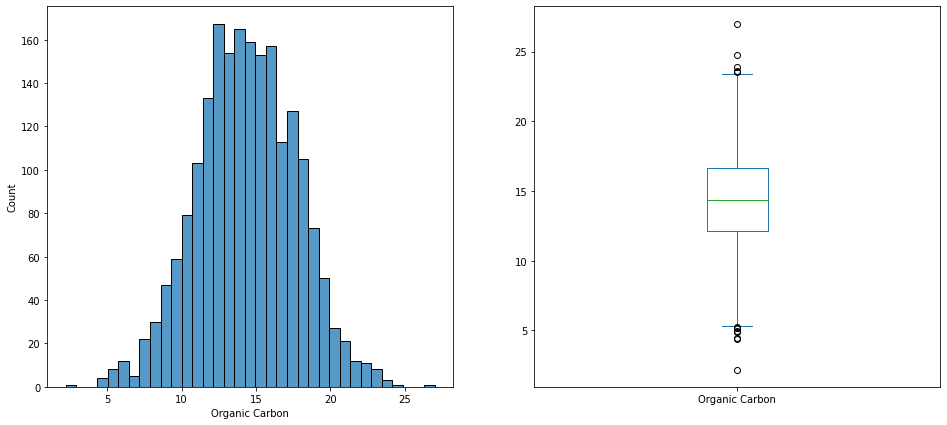

In [160]:
visualizeDistributionPlot(df["Organic Carbon"])

Berdasarkan histogram, kolom ini memiliki kecenderungan negatif yang bisa diabaikan, bentuk kurtosisnya juga mendekati histogram berdistibusi normal, sehingga kolom ini bisa dianggap berdistribusi normal. Dari boxplot dapat dilihat bahwa kolom ini memiliki sedikit outlier di kedua ujung.
***

#### **Plot Distribusi Kolom Trihalomethanes**

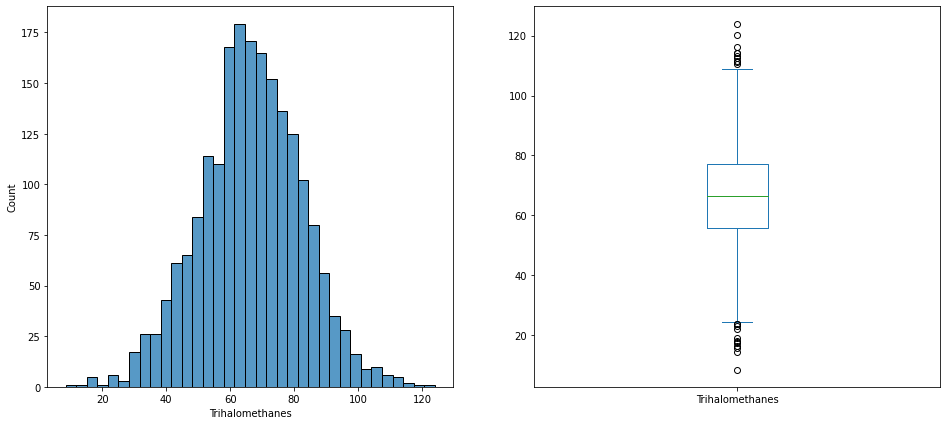

In [161]:
visualizeDistributionPlot(df["Trihalomethanes"])

Berdasarkan histogram, kolom ini memiliki kecenderungan negatif yang bisa diabaikan, bentuk kurtosisnya juga mendekati histogram berdistibusi normal, sehingga kolom ini bisa dianggap berdistribusi normal. Dari boxplot dapat dilihat bahwa kolom ini memiliki beberapa outlier di kedua ujung.
***

#### **Plot Distribusi Kolom Turbidity**

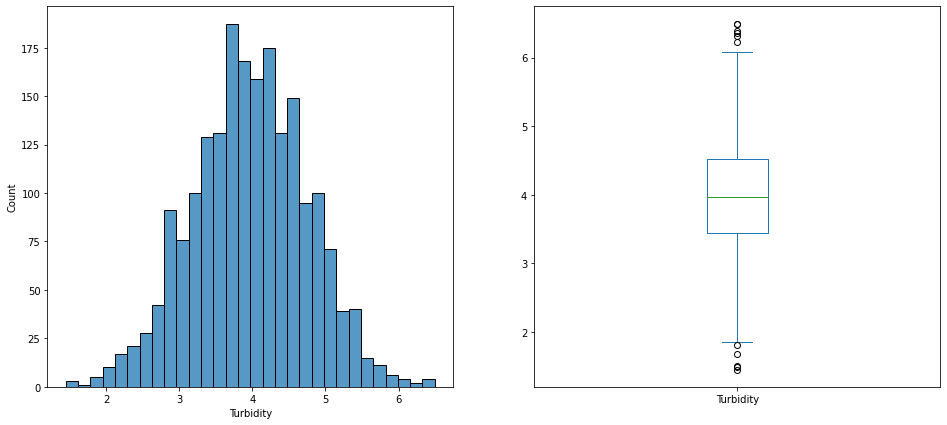

In [162]:
visualizeDistributionPlot(df["Turbidity"])

Berdasarkan histogram, kolom ini memiliki kecenderungan positif yang bisa diabaikan, bentuk kurtosisnya juga mendekati histogram berdistibusi normal, sehingga kolom ini bisa dianggap berdistribusi normal. Dari boxplot dapat dilihat bahwa kolom ini memiliki sedikit outlier di kedua ujung.

***
### **SOAL 5**
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

**Enam Langkah Testing:**
1. Tentukan Hipotesis nol $(H_0: θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dst.).
2. Pilih hipotesis alternatif H1 salah dari dari $θ > θ_0$, $θ < θ_0$, atau $θ ≠ θ_0$.
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

In [163]:
def describeTwoSamples(df1, df2, attr = [" 1", " 2"]):
    desc1 = df1.describe()
    desc2 = df2.describe()
    desc = pd.merge(desc1, desc2, left_index=True, right_index=True, suffixes=(attr[0], attr[1]))
    print(desc)

def drawBoxPlot(df1, df2, attr = ["Sampel 1", "Sampel 2"]):
    plt.figure(figsize=(16, 7))
    b = [df1, df2]
    plt.boxplot(b)
    plt.xticks([1, 2], [attr[0], attr[1]])
    plt.show()


***
#### **Bagian a**
Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

**Deskripsi Statistik Kedua Sampel**

In [164]:
df1 = df["Sulfate"].head(len(df)//2)
df2 = df["Sulfate"].tail(len(df)//2)
describeTwoSamples(df1, df2, [" Awal",  " Akhir"])

       Sulfate Awal  Sulfate Akhir
count   1005.000000    1005.000000
mean     331.305330     335.117423
std       41.332755      41.021129
min      129.000000     205.935091
25%      307.563455     307.752703
50%      330.390976     333.439570
75%      356.552697     362.415419
max      476.539717     481.030642


**Blox Plot Kedua Sampel**

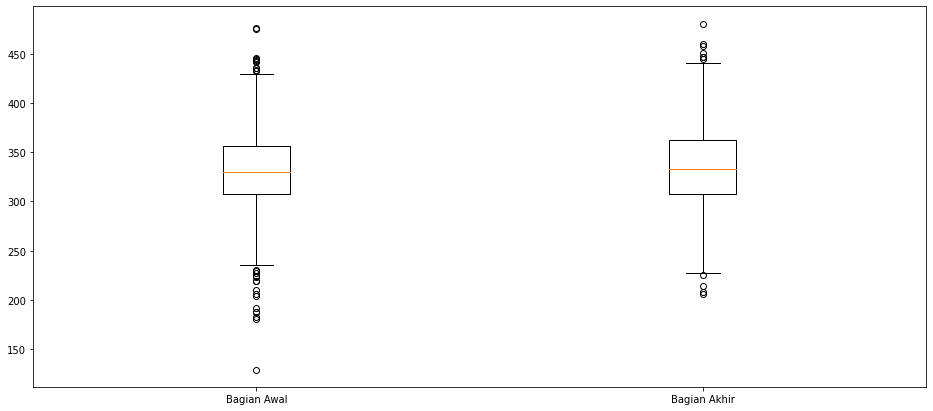

In [165]:
drawBoxPlot(df1, df2, ["Bagian Awal", "Bagian Akhir"])

**Uji Hipotesis**

**1. Hipotesis Nol** <br>
$H_0: \mu_{Sulfate\_awal} = \mu_{Sulfate\_akhir} \iff  \mu_{Sulfate\_awal} - \mu_{Sulfate\_akhir} = 0$

**2. Hipotesis Alternatif** <br>
$H_1: \mu_{Sulfate\_awal} \neq \mu_{Sulfate\_akhir} \iff \mu_{Sulfate\_awal} - \mu_{Sulfate\_akhir} \neq 0$ (two-sided)

**3. Tingkat Signifikan** <br>
$\alpha = 0.05$

**4. Uji Statistik dan Daerah Kritis** <br>
Uji Statistik&nbsp; &emsp;: Two sample, two sided, variansi diketahui dan derajat kebebasan > 30, sehingga z-test <br>
Daerah kritis&emsp;: $z < -1.96$ atau $z > 1.96$, diperoleh dari $z_{\frac{\alpha}{2}} = 1.96$

**5. Nilai Uji Statistik dan $p$-value** <br>
$$
z = \frac{(\bar{x_1}-\bar{x_2}) - d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}
$$
$$
p = P(Z > |z|) + P(Z < -|z|) = 2(1-P(Z < |z|))
$$

In [166]:
z = (df1.mean()-df2.mean())/sqrt(df1.var()/len(df1) + df2.var()/len(df2))
p = 2*(1-norm.cdf(abs(z)))

print(f"z = {z}")
print(f"p = {p}")

z = -2.0752690696871983
p = 0.03796160438512852


**6. Keputusan** <br>
Karena $z$ berada dalam daerah kritis, $z = -2.075 < -1.96$, disimpulkan bahwa $H_0$ **dapat ditolak**. <br> Dengan demikian, rata-rata kedua sampel **tidak sama**

***
#### **Bagian b**
Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

**Deskripsi Statistik Kedua Sampel**

In [167]:
df1 = df["Organic Carbon"].head(len(df)//2)
df2 = df["Organic Carbon"].tail(len(df)//2)
describeTwoSamples(df1, df2, [" Awal", " Akhir"])

       Organic Carbon Awal  Organic Carbon Akhir
count          1005.000000           1005.000000
mean             14.253973             14.461907
std               3.351162              3.298573
min               2.200000              4.466772
25%              11.983961             12.244622
50%              14.210624             14.356496
75%              16.684074             16.682025
max              23.917601             27.006707


**Blox Plot Kedua Sampel**

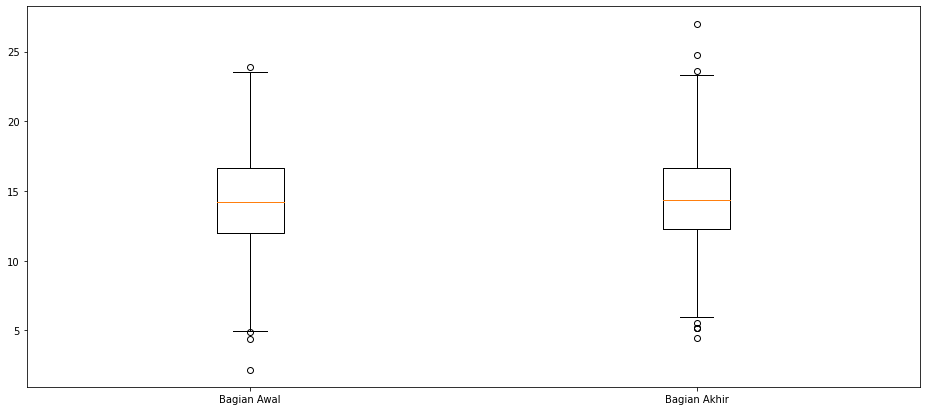

In [168]:
drawBoxPlot(df1, df2, ["Bagian Awal", "Bagian Akhir"])

**Uji Hipotesis**

**1. Hipotesis Nol** <br>
$H_0: \mu_{OrganicCarbon\_awal} = \mu_{OrganicCarbon\_akhir} + 0.15 \iff  \mu_{OrganicCarbon\_awal} - \mu_{OrganicCarbon\_akhir} = 0.15$

**2. Hipotesis Alternatif** <br>
$H_1: \mu_{OrganicCarbon\_awal} \neq \mu_{OrganicCarbon\_akhir} + 0.15 \iff \mu_{OrganicCarbon\_awal} - \mu_{OrganicCarbon\_akhir} \neq 0.15$ (two-sided)

**3. Tingkat Signifikan** <br>
$\alpha = 0.05$

**4. Uji Statistik dan Daerah Kritis** <br>
Uji Statistik&nbsp; &emsp;: Two sample, two sided, variansi diketahui dan derajat kebebasan > 30, sehingga z-test <br>
Daerah kritis&emsp;: $z < -1.96$ atau $z > 1.96$, diperoleh dari $z_{\frac{\alpha}{2}} = 1.96$

**5. Nilai Uji Statistik dan $p$-value** <br>
$$
z = \frac{(\bar{x_1}-\bar{x_2}) - d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}
$$
$$
p = P(Z > |z|) + P(Z < -|z|) = 2(1-P(Z < |z|))
$$

In [169]:
z = (df1.mean()-df2.mean() - 0.15)/sqrt(df1.var()/len(df1) + df2.var()/len(df2))
p = 2*(1-norm.cdf(abs(z)))

print(f"z = {z}")
print(f"p = {p}")

z = -2.413145517798807
p = 0.015815503817599996


**6. Keputusan** <br>
Karena $z$ berada dalam daerah kritis, $z = -2.413 < -1.96$, disimpulkan bahwa $H_0$ **dapat ditolak**. <br> Dengan demikian, rata-rata sampel pertama **tidak lebih besar** dari pada sampel kedua sebesar 0.15

***
#### **Bagian c**
Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

**Deskripsi Statistik Kedua Sampel**

In [170]:
df1 = df["Chloramines"].head(100)
df2 = df["Chloramines"].tail(100)
describeTwoSamples(df1, df2, [" Awal", " Akhir"])

       Chloramines Awal  Chloramines Akhir
count        100.000000         100.000000
mean           7.007771           7.147198
std            1.480892           1.306806
min            3.606036           3.458192
25%            6.098138           6.336701
50%            7.071012           7.113334
75%            8.070950           7.975377
max           10.056852          10.282329


**Blox Plot Kedua Sampel**

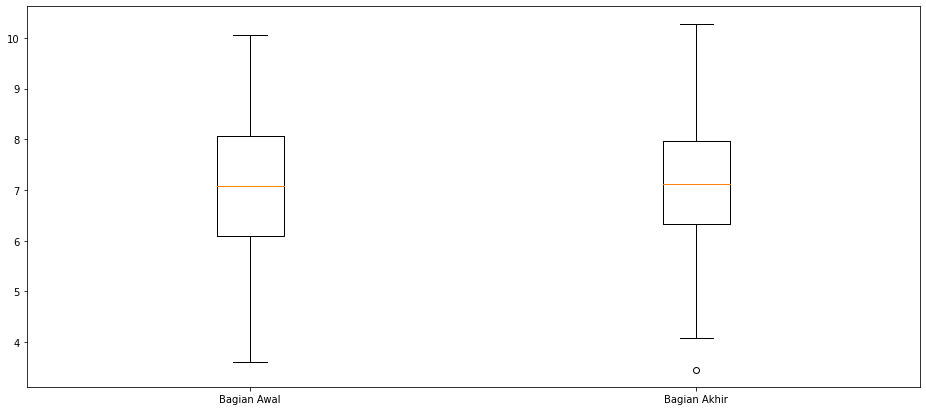

In [171]:
drawBoxPlot(df1, df2, ["Bagian Awal", "Bagian Akhir"])

**Uji Hipotesis**

**1. Hipotesis Nol** <br>
$H_0: \mu_{Chloramines\_awal} = \mu_{Chloramines\_akhir} \iff  \mu_{Chloramines\_awal} - \mu_{Chloramines\_akhir} = 0$

**2. Hipotesis Alternatif** <br>
$H_1: \mu_{Chloramines\_awal} \neq \mu_{Chloramines\_akhir} \iff \mu_{Chloramines\_awal} - \mu_{Chloramines\_akhir} \neq 0$ (two-sided)

**3. Tingkat Signifikan** <br>
$\alpha = 0.05$

**4. Uji Statistik dan Daerah Kritis** <br>
Uji Statistik&nbsp; &emsp;: Two sample, two sided, variansi diketahui dan derajat kebebasan > 30, sehingga z-test <br>
Daerah kritis&emsp;: $z < -1.96$ atau $z > 1.96$, diperoleh dari $z_{\frac{\alpha}{2}} = 1.96$

**5. Nilai Uji Statistik dan $p$-value** <br>
$$
z = \frac{(\bar{x_1}-\bar{x_2}) - d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}
$$
$$
p = P(Z > |z|) + P(Z < -|z|) = 2(1-P(Z < |z|))
$$

In [172]:
z = (df1.mean()-df2.mean())/sqrt(df1.var()/len(df1) + df2.var()/len(df2))
p = 2*(1-norm.cdf(abs(z)))

print(f"z = {z}")
print(f"p = {p}")

z = -0.7059424842236872
p = 0.48022390604502796


**6. Keputusan** <br>
Karena $z$ tidak berada dalam daerah kritis $-1.96 < z = -0.706 < 1.96$ dan $p$-value $> \alpha$ disimpulkan bahwa $H_0$ **gagal ditolak**. <br> Dengan demikian, rata-rata sampel pertama **sama dengan** rata-rata sampel kedua

***
#### **Bagian d**
Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity?

**Deskripsi Statistik Kedua Sampel**

In [173]:
df1 = df["Turbidity"].head(len(df)//2)
df2 = df["Turbidity"].tail(len(df)//2)
describeTwoSamples(df1, df2, [" Awal", " Akhir"])

       Turbidity Awal  Turbidity Akhir
count     1005.000000      1005.000000
mean         3.942879         3.996115
std          0.786455         0.773917
min          1.496101         1.450000
25%          3.403393         3.488675
50%          3.964450         3.969740
75%          4.496627         4.549917
max          6.494249         6.494749


**Blox Plot Kedua Sampel**

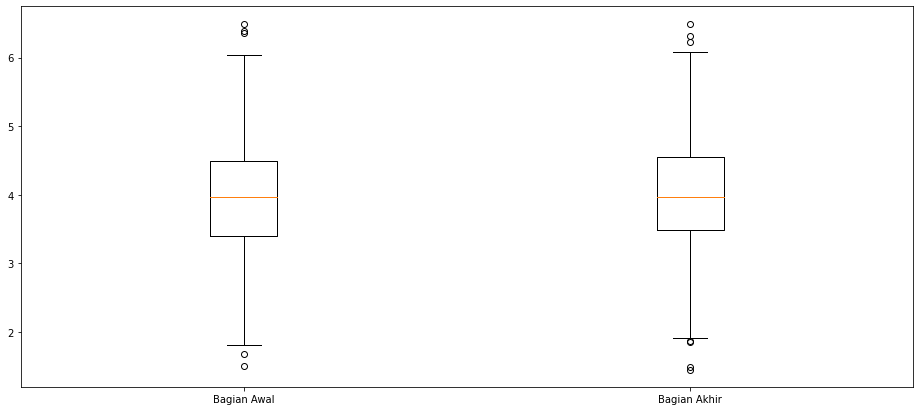

In [174]:
drawBoxPlot(df1, df2, ["Bagian Awal", "Bagian Akhir"])

**Uji Hipotesis**

**1. Hipotesis Nol** <br>
$H_0: p_{Turbidity\_awal} = p_{Turbidity\_akhir} \iff  p_{Turbidity\_awal} - p_{Turbidity\_akhir} = 0$

**2. Hipotesis Alternatif** <br>
$H_1: p_{Turbidity\_awal} > p_{Turbidity\_akhir} \iff p_{Turbidity\_awal} - p_{Turbidity\_akhir} > 0$ (one-sided)

**3. Tingkat Signifikan** <br>
$\alpha = 0.05$

**4. Uji Statistik dan Daerah Kritis** <br>
Uji Statistik&nbsp; &emsp;: Two sample, one sided, proportion test <br>
Daerah kritis&emsp;: $z > 1.645$, diperoleh dari $z_{\alpha} = 1.645$

**5. Nilai Uji Statistik dan $p$-value** <br>
$$
z = \frac{(\hat{p_1}-\hat{p_2})}{\sqrt{\hat{p}\hat{q}(1/n_1 + 1/n_2)}}
$$
$$
\hat{p_i} = \frac{x_i}{n_i}, \hat{p} = \frac{x_1+x_2}{n_1+n2}
$$
$$
p = P(Z > z) = 1-P(Z < z)
$$

In [175]:
x1 = len(df1.loc[df1 > 4])
x2 = len(df2.loc[df2 > 4])

n1 = len(df1)
n2 = len(df2)

p1 = x1/n1
p2 = x2/n2
phat = (x1+x2)/(n1+n2)
qhat = 1-phat

z = (p1-p2)/sqrt(phat*qhat*(1/n1 + 1/n2))
p = 1-norm.cdf(z)

print(f"z = {z}")
print(f"p = {p}")

z = -0.13388958661778735
p = 0.5532550575911831


**6. Keputusan** <br>
Karena $z$ tidak berada dalam daerah kritis $z = -0.134 < 1.645$ dan $p$-value $> \alpha$ disimpulkan bahwa $H_0$ **gagal ditolak**. <br> Dengan demikian, proporsi data yang lebih dari empat pada sampel pertama **tidak lebih besar** dibandingkan proporsi sampel kedua

***
#### **Bagian e**
Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

**Deskripsi Statistik Kedua Sampel**

In [176]:
df1 = df["Sulfate"].head(len(df)//2)
df2 = df["Sulfate"].tail(len(df)//2)
describeTwoSamples(df1, df2, [" Awal", " Akhir"])

       Sulfate Awal  Sulfate Akhir
count   1005.000000    1005.000000
mean     331.305330     335.117423
std       41.332755      41.021129
min      129.000000     205.935091
25%      307.563455     307.752703
50%      330.390976     333.439570
75%      356.552697     362.415419
max      476.539717     481.030642


**Blox Plot Kedua Sampel**

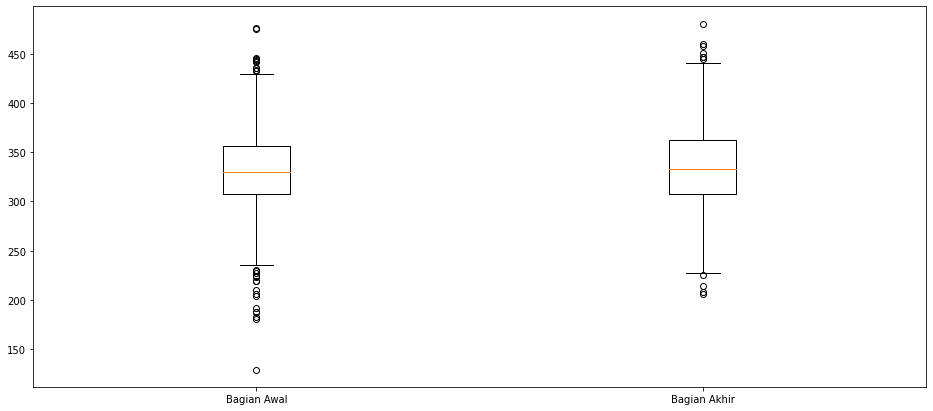

In [177]:
drawBoxPlot(df1, df2, ["Bagian Awal", "Bagian Akhir"])

**Uji Hipotesis**

**1. Hipotesis Nol** <br>
$H_0: \sigma^2_{Sulfate\_awal} = \sigma^2_{Sulfate\_akhir} \iff  \sigma^2_{Sulfate\_awal} - \sigma^2_{Sulfate\_akhir} = 0$

**2. Hipotesis Alternatif** <br>
$H_1: \sigma^2_{Sulfate\_awal} \neq \sigma^2_{Sulfate\_akhir} \iff \sigma^2_{Sulfate\_awal} - \sigma^2_{Sulfate\_akhir} \neq 0$ (two-sided)

**3. Tingkat Signifikan** <br>
$\alpha = 0.05$

**4. Uji Statistik dan Daerah Kritis** <br>
Uji Statistik&nbsp; &emsp;: distribusi F <br>
Daerah kritis&emsp;: $f > f_{\frac{\alpha}{2}}(v_1, v_2) = f_1$ atau $f < f_{1-\frac{\alpha}{2}}(v_1, v_2) = f_2$, yaitu

In [178]:
alpha = 0.05
v1 = len(df1)-1
v2 = len(df2)-1

f1 = norm.ppf(1-alpha/2, v1, v2)
f2 = 1/norm.ppf(1-alpha/2, v2, v1)

print(f"f1 = {f1}")
print(f"f2 = {f2}")
print(f"Daerah kritis\t: f > {f1} atau f < {f2}")

f1 = 2971.803840478214
f2 = 0.00033649596463240414
Daerah kritis	: f > 2971.803840478214 atau f < 0.00033649596463240414


**5. Nilai Uji Statistik dan $p$-value** <br>
$$
f = \frac{s^2_1}{s^2_2}
$$
$$
p = P(F > |f|) + P(F < -|f|) = 2(1-P(F < |f|))
$$

In [179]:
f = df1.var()/df2.var()
p = 2*(1-norm.cdf(abs(f), v1, v2))

print(f"f = {f}")
print(f"p = {p}")

f = 1.0152511043950063
p = 1.6821998800807634


**6. Keputusan** <br>
Karena $f$ tidak berada dalam daerah kritis $f_2 < f = 1.01 < f_1$ dan $p$-value $> \alpha$ disimpulkan bahwa $H_0$ **gagal ditolak**. <br> Dengan demikian, variansi kedua sampel **sama**

***
### **SOAL 6**
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

**Intepretasi Koefisien Korelasi:**

$ c < 0 $ : Berkorelasi negatif, berbanding terbalik <br>
$ c = 0 $ : Tidak berkorelasi <br>
$ c > 0 $ : Berkorelasi positif, berbanding lurus <br>

$ |c| < 0.30$ : *Negligible* <br>
$0.30 \leq |c| < 0.50$ : *Weak* <br>
$0.50 \leq |c| < 0.70$ : *Moderate* <br>
$0.70 \leq |c| < 0.90$ : *Strong* <br>
$|c| \geq 0.90$ : *Very Strong* <br>


In [180]:
def drawScatterPlot(col1, col2, data):
    plt.figure(figsize=(16, 7))
    plt.scatter(data[col1], data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    def printf(str):
        display(Markdown(str))
    c = df[col1].corr(df[col2])
    printf(f"Koefisien korelasi = {c}")
    verdict = ""
    if(c == 0):
        printf("Intepretasi koefisien: Kedua kolom tidak berkorelasi")
    elif(c < 0):
        verdict += "Intepretasi koefisien: Kedua kolom **berkorelasi negatif**"
    else:
        verdict += "Intepretasi koefisien: Kedua kolom **berkorelasi positif**"
    if(abs(c) < 0.3):
        verdict += ", tetapi ***negligible***."
    elif(abs(c) < 0.5):
        verdict += ", tetapi ***weak***."
    elif(abs(c) < 0.7):
        verdict += ", dan ***moderate***."
    elif(abs(c) < 0.9):
        verdict += ", dan ***strong***."
    else:
        verdict += ", dan ***very strong***."
    printf(verdict)

***

#### **Korelasi Potability dengan pH**

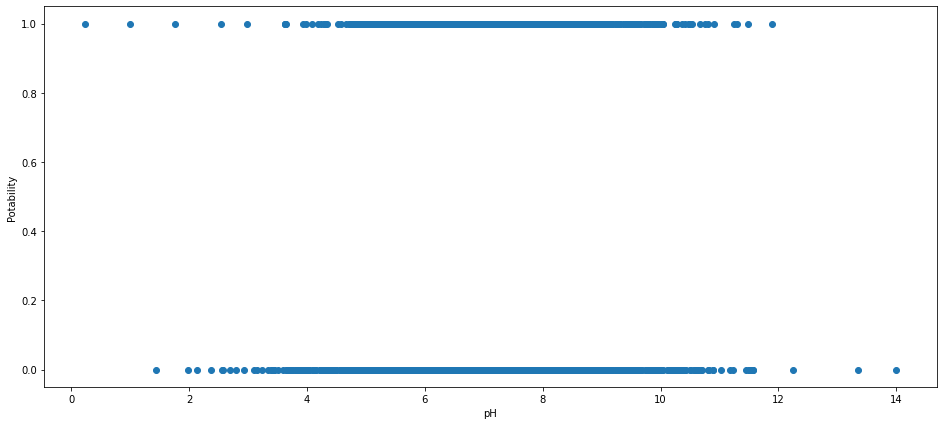

Koefisien korelasi = 0.01547509440843348

Intepretasi koefisien: Kedua kolom **berkorelasi positif**, tetapi ***negligible***.

In [181]:
drawScatterPlot("pH", "Potability", df)

***

#### **Korelasi Potability dengan Hardness**

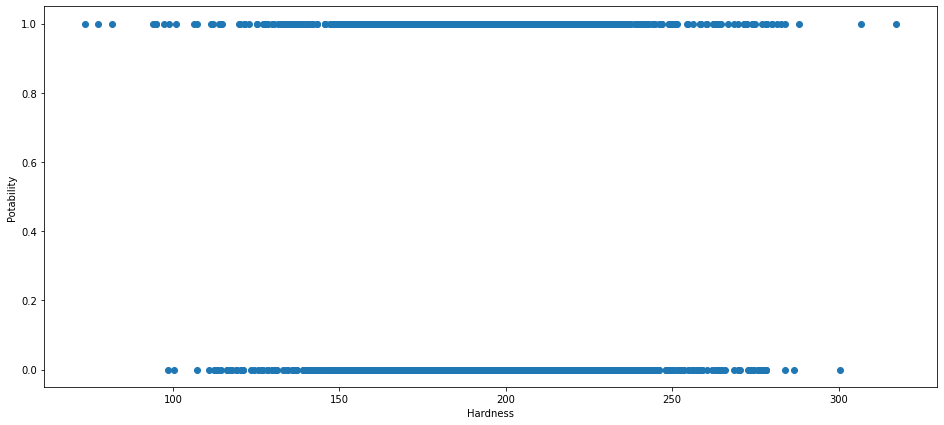

Koefisien korelasi = -0.0014631528959479344

Intepretasi koefisien: Kedua kolom **berkorelasi negatif**, tetapi ***negligible***.

In [182]:
drawScatterPlot("Hardness", "Potability", df)

***

#### **Korelasi Potability dengan Solids**

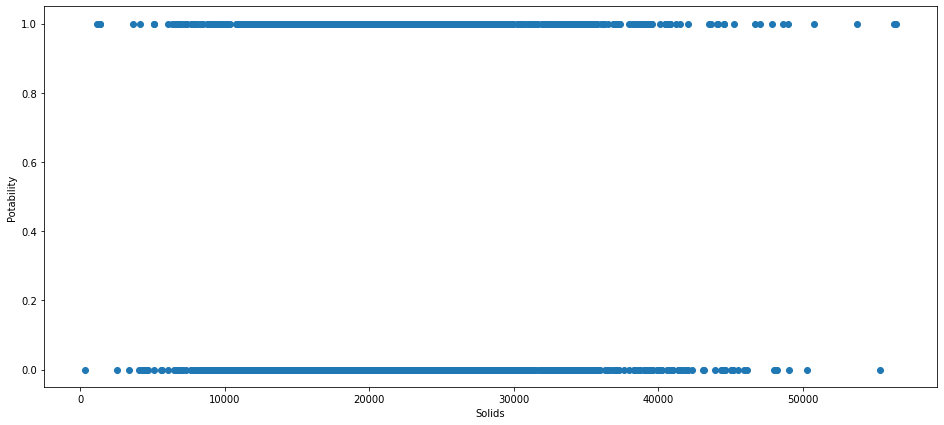

Koefisien korelasi = 0.03897657818173466

Intepretasi koefisien: Kedua kolom **berkorelasi positif**, tetapi ***negligible***.

In [183]:
drawScatterPlot("Solids", "Potability", df)

***

#### **Korelasi Potability dengan Chloramines**

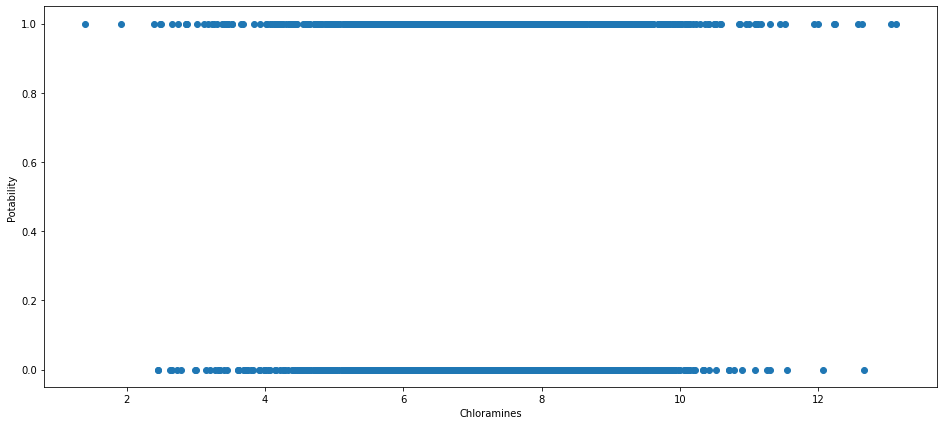

Koefisien korelasi = 0.02077892184052409

Intepretasi koefisien: Kedua kolom **berkorelasi positif**, tetapi ***negligible***.

In [184]:
drawScatterPlot("Chloramines", "Potability", df)

***

#### **Korelasi Potability dengan Sulfate**

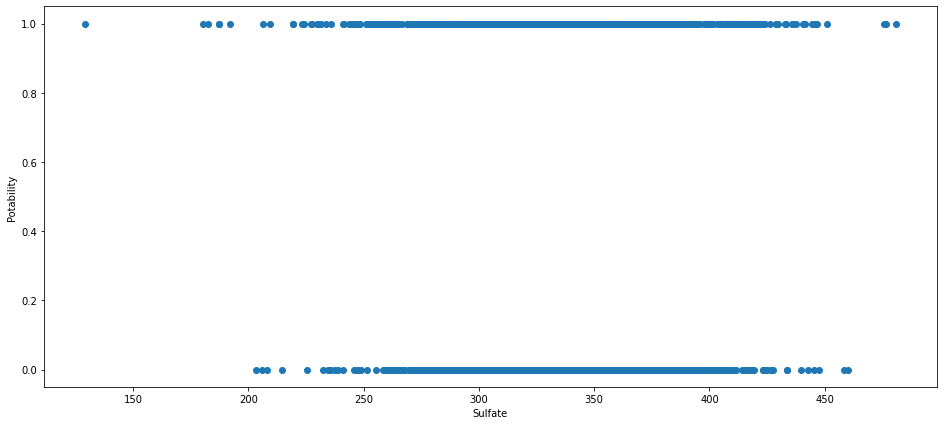

Koefisien korelasi = -0.015703164419273778

Intepretasi koefisien: Kedua kolom **berkorelasi negatif**, tetapi ***negligible***.

In [185]:
drawScatterPlot("Sulfate", "Potability", df)

***

#### **Korelasi Potability dengan Conductivity**

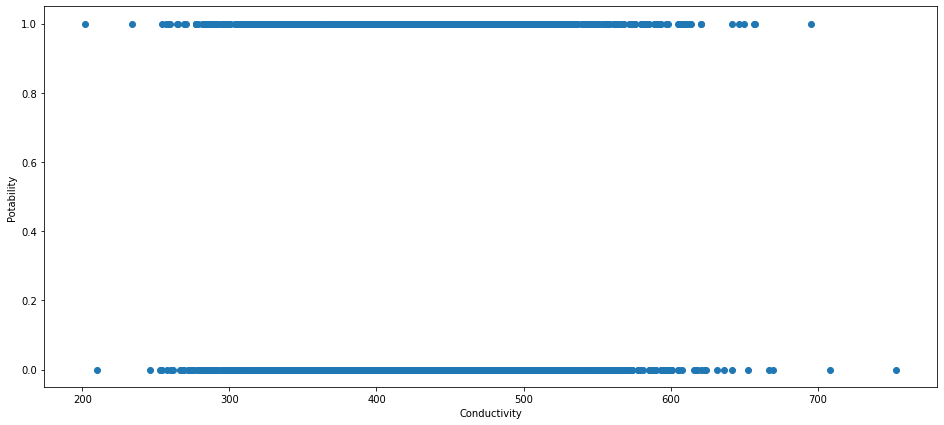

Koefisien korelasi = -0.016257120111377067

Intepretasi koefisien: Kedua kolom **berkorelasi negatif**, tetapi ***negligible***.

In [186]:
drawScatterPlot("Conductivity", "Potability", df)

***

#### **Korelasi Potability dengan Organic Carbon**

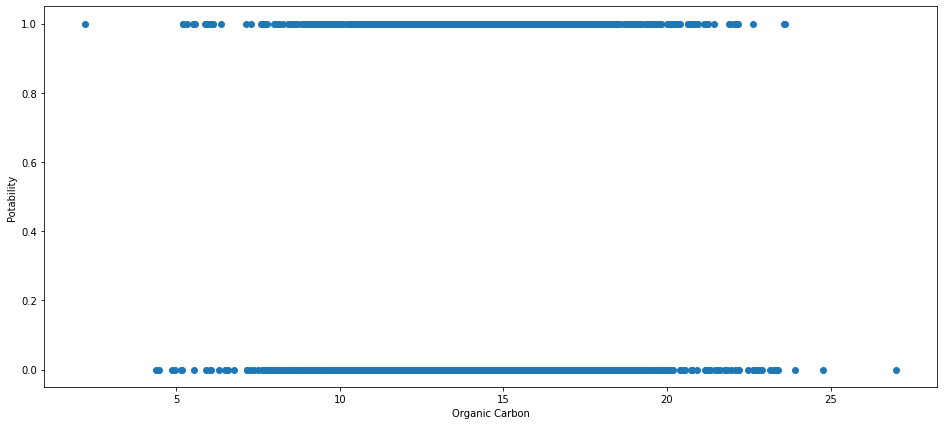

Koefisien korelasi = -0.015488461910747259

Intepretasi koefisien: Kedua kolom **berkorelasi negatif**, tetapi ***negligible***.

In [187]:
drawScatterPlot("Organic Carbon", "Potability", df)

***

#### **Korelasi Potability dengan Trihalomethanes**

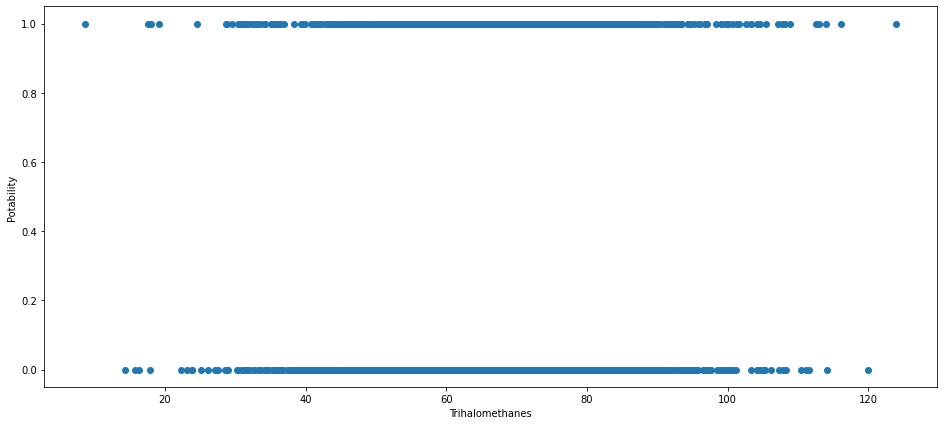

Koefisien korelasi = 0.009236711064712997

Intepretasi koefisien: Kedua kolom **berkorelasi positif**, tetapi ***negligible***.

In [188]:
drawScatterPlot("Trihalomethanes", "Potability", df)

***

#### **Korelasi Potability dengan Turbidity**

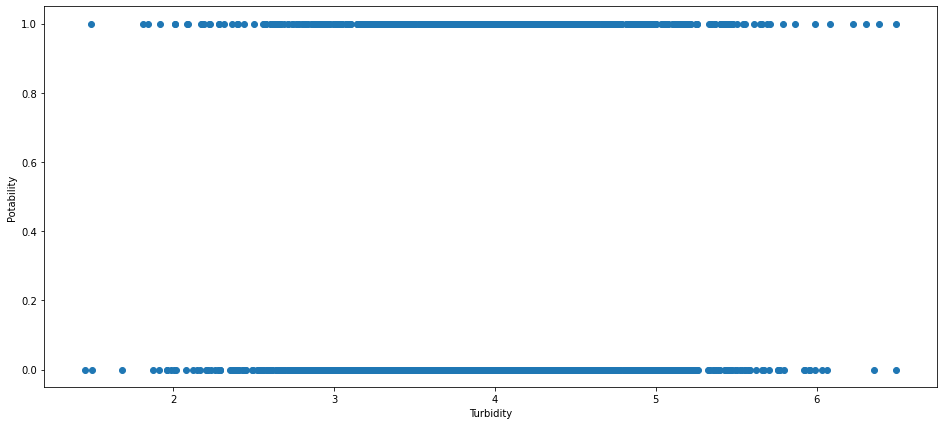

Koefisien korelasi = 0.022331042640622665

Intepretasi koefisien: Kedua kolom **berkorelasi positif**, tetapi ***negligible***.

In [189]:
drawScatterPlot("Turbidity", "Potability", df)

***